In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Q5: Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [58]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv',nrows=6729)
gdp_df.tail(6)

# near row 6729, the number of columns changes which results in errors for .read_csv
# nrows limits the number of rows to load, preventing errors 
# skipfooter= is also an option not used here

,Country or Area,Year,Value,Value Footnotes
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


#### Q6: Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [59]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
#limited rows to 4496 with nrow=
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


### Q7: Look at the shape of each dataframe - how many rows, how many columns.

In [60]:
gdp_df.shape

(6729, 4)

In [61]:
internet_df.shape

(4495, 4)

### Q8. Take a look at the data types for the columns in each table.

In [135]:
gdp_df.dtypes
# object  string
# int64   integer
# float64  decimal

# alternative approach   use .info

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [134]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

#### Q9 take a look at the last 10 rows of each dataset in turn.

In [66]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [67]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### Q10: Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.



In [68]:
type(gdp_df)

pandas.core.frame.DataFrame

In [69]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [70]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

#### Q11: Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [71]:
# using the .rename() function
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

#### Q12: Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [72]:
# this time using df.columns =  to change column names 
internet_df.columns = ['Country','Year','Internet_Users_Pct']
internet_df.head(20)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


#### Q13: Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [74]:
gdp_and_internet_use= pd.merge(gdp_df,
                               internet_df,
                               on = ['Country','Year'],  #joining on 2 columns because together they act as unique identifier
                               how ='outer')

In [75]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


#### Q14: Look at the first five rows of your new data frame to confirm it merged correctly.

In [76]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


#### Q15: Look at the last five rows to make sure the data is clean and as expected.

In [77]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


#### Q16: Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [137]:
my_years = ['2004','2009','2014']
gdp_and_internet_use_my_years = gdp_and_internet_use.query('Year in @my_years')
gdp_and_internet_use_my_years
#  created list and referenced it with @
#  alternatively could use .isin()
#  alternative  gdp_and_internet_use[(gdp_and_internet_use.Year == 2004)|
#                                     (gdp_and_internet_use.Year==2009)|
#                                     (gdp_and_internet_use.Year==2014)]
#  .query('Year == (2004,2009,2014)')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510


#### Q17: Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [79]:
gdp_and_internet_use_2004 = gdp_and_internet_use_my_years.query('Year == 2004')
gdp_and_internet_use_2009 = gdp_and_internet_use_my_years.query('Year == 2009')
gdp_and_internet_use_2014 = gdp_and_internet_use_my_years.query('Year == 2014')

#### Q18: Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).


In [80]:
## using sort_values() function on 2014 dataframe
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

# alternate method is:
# gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct'].idxmax()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


#### Q19: Which country had the lowest percentage of internet users in 2014? What was the percentage?


In [81]:
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


#### Q20: Repeat for 2004 and 2009.

In [82]:
gdp_and_internet_use_2004.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89


In [83]:
gdp_and_internet_use_2004.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


In [84]:
gdp_and_internet_use_2009.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.0


In [85]:
gdp_and_internet_use_2009.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


#### Q21: Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [86]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


#### Q22: Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [87]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


#### Q23: Create some scatterplots:

#### a. 2004 Percent Using the Internet vs GDP Per Capita

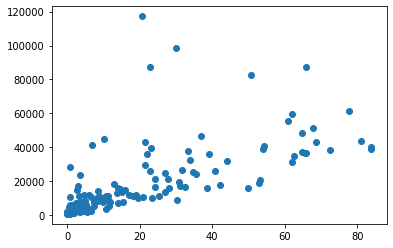

In [88]:
plt.scatter(gdp_and_internet_use_2004.Internet_Users_Pct,gdp_and_internet_use_2004.GDP_Per_Capita)

#### b. 2009 Percent Using the Internet vs GDP Per Capita

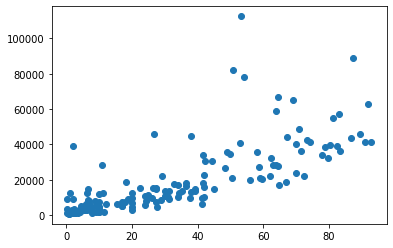

In [89]:
plt.scatter(gdp_and_internet_use_2009.Internet_Users_Pct,gdp_and_internet_use_2009.GDP_Per_Capita)

#### c. 2014 Percent Using the Internet vs GDP Per Capita

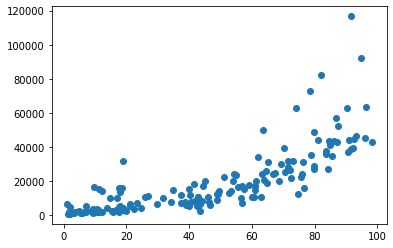

In [90]:
plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct,gdp_and_internet_use_2014.GDP_Per_Capita)

#### Q24: Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

    1. In earlier years, internet was less available to lower GDP countries
    2. As years progressed, it become more available to lower GDP countries

#### Q25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Yes, it is unimodal

C:\Users\ben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ben\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([130.,  56.,  25.,  17.,   6.,   2.,   1.,   1.,   1.,   1.]),
 array([   672.68164828,  13649.32415084,  26625.9666534 ,  39602.60915596,
         52579.25165852,  65555.89416109,  78532.53666365,  91509.17916621,
        104485.82166877, 117462.46417133, 130439.1066739 ]),
 <a list of 10 Patch objects>)

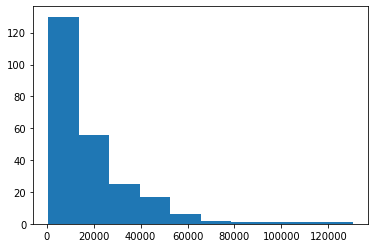

In [91]:
plt.hist(gdp_and_internet_use_2014.GDP_Per_Capita)

#### Q26: Look at the distribution of Internet Use for 2014. Is it unimodal?

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <a list of 10 Patch objects>)

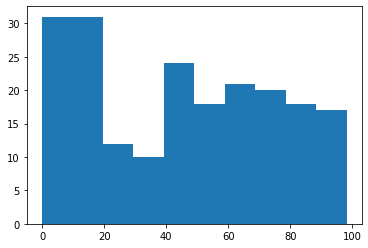

In [92]:
plt.hist(gdp_and_internet_use_2014.Internet_Users_Pct)

No, it appears bimodal

#### Q27: What are the top 5 countries in terms of internet use in 2014?



In [93]:
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90



#### Q28: Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [94]:
##created list to reference
top_5_internet_list = ['Iceland','Bermuda','Norway','Denmark','Andorra']
## queried a previous query
top_5_internet =  gdp_and_internet_use_my_years.query('Country in @top_5_internet_list')
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
542,Bermuda,2009,57151.919132,83.250000
547,Bermuda,2004,55452.638880,60.990867
1404,Denmark,2014,45057.083449,95.990000
1409,Denmark,2009,43382.615688,86.840000
1414,Denmark,2004,43670.446201,80.930000
2581,Iceland,2014,42774.888849,98.160000
2586,Iceland,2009,41505.084834,93.000000
2591,Iceland,2004,38893.378798,83.880000
4530,Norway,2014,63328.259526,96.300000
4535,Norway,2009,62617.153609,92.080000


In [95]:
top_5_internet = top_5_internet.sort_values(by = ['Country','Year'], ascending = False)

In [96]:
top_5_internet.shape

(15, 4)

#### Q29: Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

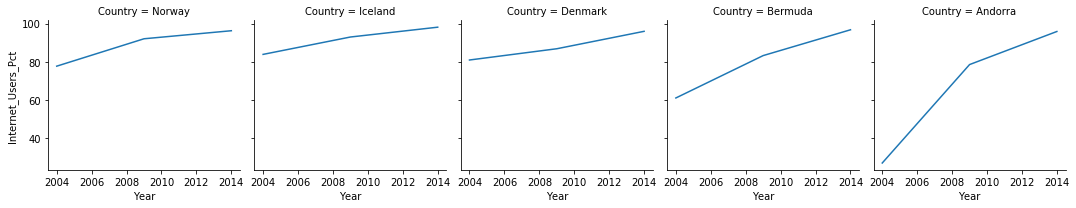

In [97]:
##setup plot areas
trend = sns.FacetGrid(top_5_internet,col='Country')
## filling each plot area
trend.map(plt.plot,'Year','Internet_Users_Pct')

#### Q30: Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?



In [98]:
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


In [99]:
##created list to reference
bottom_5_internet_list = ["Dem. People's Rep. of Korea",'Eritrea','Timor-Leste','Burundi','Somalia']
## queried a previous query
bottom_5_internet =  gdp_and_internet_use_my_years.query('Country in @bottom_5_internet_list')
## sort the list by Country, Year
bottom_5_internet = bottom_5_internet.sort_values(by = ['Country','Year'], ascending = False)
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6044,Timor-Leste,2014,6466.737732,1.140000
6049,Timor-Leste,2009,9275.529371,0.185252
6054,Timor-Leste,2004,4898.575839,NaN
7521,Somalia,2014,NaN,1.630000
7525,Somalia,2009,NaN,1.160611
7530,Somalia,2004,NaN,1.053455
6999,Eritrea,2014,NaN,0.990000
1722,Eritrea,2009,1950.533339,0.540000
1727,Eritrea,2004,2317.349879,NaN
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000


In [100]:
bottom_5_internet.shape

(15, 4)

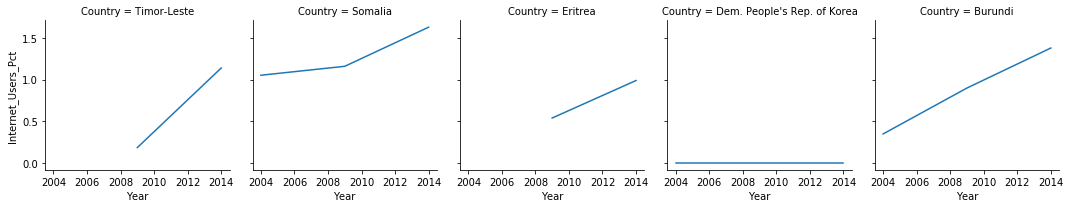

In [103]:
##setup plot areas
trend_bottom_5 = sns.FacetGrid(bottom_5_internet,col='Country')
## filling each plot area
trend_bottom_5.map(plt.plot,'Year','Internet_Users_Pct')

#### Q31: Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

In [104]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [144]:
top_5_gdp_2014_list = ["Macao SAR, China",'Qatar','Luxembourg','Singapore','Brunei']
## first queried gdp_and_internet_use referencing list to create df with all years
top_5_gdp_all_years = gdp_and_internet_use.query('Country in @top_5_gdp_2014_list')
## now query again to select years from 2008-2018

top_5_gdp_10_years = top_5_gdp_all_years.query('Year >= 2009 and Year <= 2018')
## sort the list by Country, Year
##sort_values(by = ['Country','Year'], ascending = False)
top_5_gdp_10_years.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
703,Brunei,2018,71802.271720,NaN
704,Brunei,2017,72523.729446,NaN
705,Brunei,2016,72369.523367,NaN
706,Brunei,2015,75073.936571,NaN
707,Brunei,2014,76448.593329,NaN
708,Brunei,2013,79323.437454,NaN
709,Brunei,2012,82149.909796,NaN
710,Brunei,2011,82502.935297,NaN
711,Brunei,2010,80556.180718,NaN
712,Brunei,2009,79485.001581,NaN


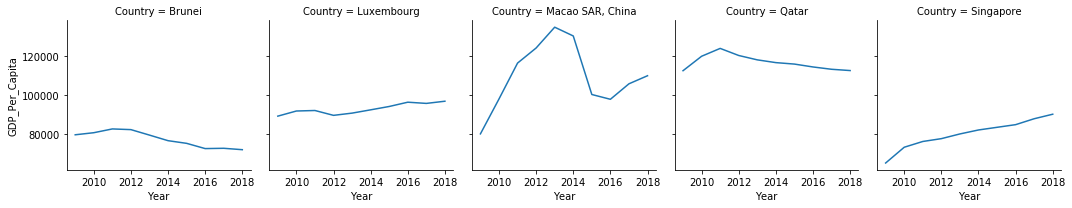

In [145]:
##setup plot areas
top_5_gdp_10_years_trend = sns.FacetGrid(top_5_gdp_10_years,col='Country')
## filling each plot area
top_5_gdp_10_years_trend.map(plt.plot,'Year','GDP_Per_Capita')

#### Q32: Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.



In [127]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


In [128]:
bottom_5_gdp_2014_list = ["Central African Republic",'Burundi','Dem. Rep. Congo','Niger','Malawi']
## first queried gdp_and_internet_use referencing above list to create df with all years
bottom_5_gdp_all_years = gdp_and_internet_use.query('Country in @bottom_5_gdp_2014_list')
## now query again to select years from 2008-2018

bottom_5_gdp_10_years = bottom_5_gdp_all_years.query('Year >= 2009 and Year <= 2018')
## sort the list by Country, Year
##sort_values(by = ['Country','Year'], ascending = False)
bottom_5_gdp_10_years.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
790,Burundi,2018,660.330341,NaN
791,Burundi,2017,670.777072,NaN
792,Burundi,2016,689.014892,NaN
793,Burundi,2015,715.549886,NaN
794,Burundi,2014,768.469837,1.38
795,Burundi,2013,760.699070,1.30
796,Burundi,2012,748.075521,1.22
797,Burundi,2011,739.219255,1.11
798,Burundi,2010,733.727723,1.00
799,Burundi,2009,721.063140,0.90


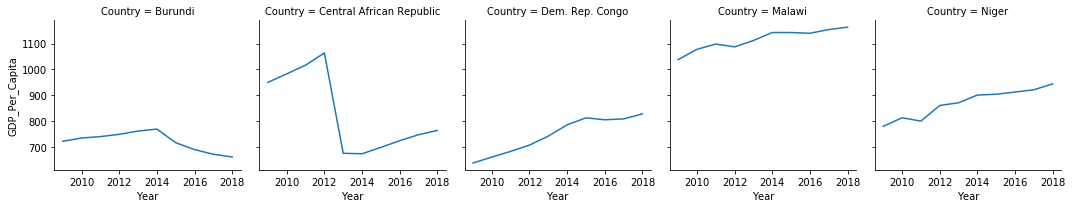

In [132]:
bottom_5_gdp_10_years_trend = sns.FacetGrid(bottom_5_gdp_10_years, col="Country")
bottom_5_gdp_10_years_trend.map(plt.plot,'Year','GDP_Per_Capita')